In [1]:
!git clone https://github.com/mille055/ct_protocol.git


Cloning into 'ct_protocol'...
remote: Enumerating objects: 601, done.
remote: Counting objects: 100% (144/144), done.
remote: Compressing objects: 100% (133/133), done.
remote: Total 601 (delta 81), reused 21 (delta 11), pack-reused 457
Receiving objects: 100% (601/601), 4.43 MiB | 8.10 MiB/s, done.
Resolving deltas: 100% (369/369), done.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import json


In [3]:
# get results dataframes
results_bm_df = pd.read_csv('/content/ct_protocol/data/results_bm_321.csv')
new_column_names = ['bm_' + column for column in results_bm_df.columns]
results_bm_df.columns = new_column_names
results_bm_df['index'] = results_bm_df['bm_index']
results_bm_df.drop('bm_index', axis=1, inplace=True)
results_bm_df.head()

,bm_protocol,bm_predicted_protocol,bm_order,bm_predicted_order,bm_comments,bm_predicted_comments,bm_score,index
0,routine,routine,CT abdomen pelvis with contrast,CT abdomen pelvis with contrast,[],['oral contrast'],0.9,0
1,routine,routine,CT chest abdomen pelvis with contrast w MIPS,CT chest abdomen pelvis with contrast,[],['oral contrast'],0.8,1
2,routine,routine,CT abdomen pelvis with contrast,CT abdomen pelvis with contrast,[],['oral contrast'],0.9,2
3,routine,routine,CT abdomen pelvis with contrast,CT abdomen pelvis with contrast,[],['oral contrast'],0.9,3
4,rcc,rcc,CT RCC protocol incl chest w MIPS and dual abd...,CT abdomen pelvis with contrast,[],[''],0.8,4


In [4]:
results_ft_df = pd.read_csv('/content/ct_protocol/data/results_ft_321.csv')
new_column_names = ['ft_' + column for column in results_ft_df.columns]
results_ft_df.columns = new_column_names
results_ft_df['index'] = results_ft_df['ft_index']
results_ft_df.drop('ft_index', axis=1, inplace=True)
results_ft_df.head()

,ft_protocol,ft_predicted_protocol,ft_order,ft_predicted_order,ft_comments,ft_predicted_comments,ft_score,index
0,routine,routine,CT abdomen pelvis with contrast,CT abdomen pelvis with contrast,[],[],1.0,0
1,routine,routine,CT chest abdomen pelvis with contrast w MIPS,CT chest abdomen pelvis with contrast w MIPS,[],[],1.0,1
2,routine,routine,CT abdomen pelvis with contrast,CT abdomen pelvis with contrast,[],[],1.0,2
3,routine,routine,CT abdomen pelvis with contrast,CT abdomen pelvis with contrast,[],[],1.0,3
4,rcc,rcc,CT RCC protocol incl chest w MIPS and dual abd...,CT RCC protocol incl chest w MIPS and dual abd...,[],[],1.0,4


In [5]:
order_info_df = pd.read_csv('/content/ct_protocol/data/test_data_.csv')
new_column_names = ['oi_' + column for column in order_info_df.columns]
order_info_df.columns = new_column_names
order_info_df['index'] = order_info_df['oi_Unnamed: 0']
order_info_df.drop('oi_Unnamed: 0', axis=1, inplace=True)
order_info_df['reason_for_exam']=order_info_df['oi_prompt_question_json']
order_info_df.head()

,oi_text,oi_prompt_question_json,oi_labels,oi___index_level_0__,index,reason_for_exam
0,Order: CT abdomen pelvis with contrast\nPrior ...,"{""accession"": ""800811"", ""order"": ""CT abdomen p...","{""accession"": ""800811"", ""predicted_order"": ""CT...",811,0,"{""accession"": ""800811"", ""order"": ""CT abdomen p..."
1,Order: CT chest abdomen pelvis with contrast w...,"{""accession"": ""800780"", ""order"": ""CT chest abd...","{""accession"": ""800780"", ""predicted_order"": ""CT...",780,1,"{""accession"": ""800780"", ""order"": ""CT chest abd..."
2,Order: CT abdomen pelvis with contrast\nPrior ...,"{""accession"": ""800819"", ""order"": ""CT abdomen p...","{""accession"": ""800819"", ""predicted_order"": ""CT...",819,2,"{""accession"": ""800819"", ""order"": ""CT abdomen p..."
3,Order: CT abdomen pelvis with contrast\nPrior ...,"{""accession"": ""800421"", ""order"": ""CT abdomen p...","{""accession"": ""800421"", ""predicted_order"": ""CT...",421,3,"{""accession"": ""800421"", ""order"": ""CT abdomen p..."
4,Order: CT RCC protocol incl chest w MIPS and d...,"{""accession"": ""800274"", ""order"": ""CT RCC proto...","{""accession"": ""800274"", ""predicted_order"": ""CT...",274,4,"{""accession"": ""800274"", ""order"": ""CT RCC proto..."


In [6]:
results_df = results_bm_df.merge(results_ft_df, on='index')
results_df.head()

,bm_protocol,bm_predicted_protocol,bm_order,bm_predicted_order,bm_comments,bm_predicted_comments,bm_score,index,ft_protocol,ft_predicted_protocol,ft_order,ft_predicted_order,ft_comments,ft_predicted_comments,ft_score
0,routine,routine,CT abdomen pelvis with contrast,CT abdomen pelvis with contrast,[],['oral contrast'],0.9,0,routine,routine,CT abdomen pelvis with contrast,CT abdomen pelvis with contrast,[],[],1.0
1,routine,routine,CT chest abdomen pelvis with contrast w MIPS,CT chest abdomen pelvis with contrast,[],['oral contrast'],0.8,1,routine,routine,CT chest abdomen pelvis with contrast w MIPS,CT chest abdomen pelvis with contrast w MIPS,[],[],1.0
2,routine,routine,CT abdomen pelvis with contrast,CT abdomen pelvis with contrast,[],['oral contrast'],0.9,2,routine,routine,CT abdomen pelvis with contrast,CT abdomen pelvis with contrast,[],[],1.0
3,routine,routine,CT abdomen pelvis with contrast,CT abdomen pelvis with contrast,[],['oral contrast'],0.9,3,routine,routine,CT abdomen pelvis with contrast,CT abdomen pelvis with contrast,[],[],1.0
4,rcc,rcc,CT RCC protocol incl chest w MIPS and dual abd...,CT abdomen pelvis with contrast,[],[''],0.8,4,rcc,rcc,CT RCC protocol incl chest w MIPS and dual abd...,CT RCC protocol incl chest w MIPS and dual abd...,[],[],1.0


In [7]:
results_df = results_df.merge(order_info_df[['index', 'oi_text', 'reason_for_exam']], on='index')
results_df.head()

,bm_protocol,bm_predicted_protocol,bm_order,bm_predicted_order,bm_comments,bm_predicted_comments,bm_score,index,ft_protocol,ft_predicted_protocol,ft_order,ft_predicted_order,ft_comments,ft_predicted_comments,ft_score,oi_text,reason_for_exam
0,routine,routine,CT abdomen pelvis with contrast,CT abdomen pelvis with contrast,[],['oral contrast'],0.9,0,routine,routine,CT abdomen pelvis with contrast,CT abdomen pelvis with contrast,[],[],1.0,Order: CT abdomen pelvis with contrast\nPrior ...,"{""accession"": ""800811"", ""order"": ""CT abdomen p..."
1,routine,routine,CT chest abdomen pelvis with contrast w MIPS,CT chest abdomen pelvis with contrast,[],['oral contrast'],0.8,1,routine,routine,CT chest abdomen pelvis with contrast w MIPS,CT chest abdomen pelvis with contrast w MIPS,[],[],1.0,Order: CT chest abdomen pelvis with contrast w...,"{""accession"": ""800780"", ""order"": ""CT chest abd..."
2,routine,routine,CT abdomen pelvis with contrast,CT abdomen pelvis with contrast,[],['oral contrast'],0.9,2,routine,routine,CT abdomen pelvis with contrast,CT abdomen pelvis with contrast,[],[],1.0,Order: CT abdomen pelvis with contrast\nPrior ...,"{""accession"": ""800819"", ""order"": ""CT abdomen p..."
3,routine,routine,CT abdomen pelvis with contrast,CT abdomen pelvis with contrast,[],['oral contrast'],0.9,3,routine,routine,CT abdomen pelvis with contrast,CT abdomen pelvis with contrast,[],[],1.0,Order: CT abdomen pelvis with contrast\nPrior ...,"{""accession"": ""800421"", ""order"": ""CT abdomen p..."
4,rcc,rcc,CT RCC protocol incl chest w MIPS and dual abd...,CT abdomen pelvis with contrast,[],[''],0.8,4,rcc,rcc,CT RCC protocol incl chest w MIPS and dual abd...,CT RCC protocol incl chest w MIPS and dual abd...,[],[],1.0,Order: CT RCC protocol incl chest w MIPS and d...,"{""accession"": ""800274"", ""order"": ""CT RCC proto..."


In [8]:



def extract_accession_and_reason(json_string):
  """
  Extracts the 'accession' and 'reason for exam' values from a JSON string.

  Args:
      json_string: A string containing a JSON object.

  Returns:
      A tuple containing the 'accession' and 'reason for exam' values, or (None, None) if the JSON string is invalid or does not contain these keys.
  """
  try:
    data = json.loads(json_string)
    #print(data)
    accession = data["accession"]
    reason = data["indication"]
    return accession, reason
  except (json.JSONDecodeError, KeyError):
    return None, None

# Create new columns for accession and reason for exam
results_df["accession"] = results_df["reason_for_exam"].apply(lambda x: extract_accession_and_reason(x)[0])
results_df["indication"] = results_df["reason_for_exam"].apply(lambda x: extract_accession_and_reason(x)[1])

# Print the first five rows of the updated dataframe
results_df.head()


,bm_protocol,bm_predicted_protocol,bm_order,bm_predicted_order,bm_comments,bm_predicted_comments,bm_score,index,ft_protocol,ft_predicted_protocol,ft_order,ft_predicted_order,ft_comments,ft_predicted_comments,ft_score,oi_text,reason_for_exam,accession,indication
0,routine,routine,CT abdomen pelvis with contrast,CT abdomen pelvis with contrast,[],['oral contrast'],0.9,0,routine,routine,CT abdomen pelvis with contrast,CT abdomen pelvis with contrast,[],[],1.0,Order: CT abdomen pelvis with contrast\nPrior ...,"{""accession"": ""800811"", ""order"": ""CT abdomen p...",800811,Abdominal abscess/infection suspected; Severe ...
1,routine,routine,CT chest abdomen pelvis with contrast w MIPS,CT chest abdomen pelvis with contrast,[],['oral contrast'],0.8,1,routine,routine,CT chest abdomen pelvis with contrast w MIPS,CT chest abdomen pelvis with contrast w MIPS,[],[],1.0,Order: CT chest abdomen pelvis with contrast w...,"{""accession"": ""800780"", ""order"": ""CT chest abd...",800780,"metastatic pancreatic cancer, eval for progres..."
2,routine,routine,CT abdomen pelvis with contrast,CT abdomen pelvis with contrast,[],['oral contrast'],0.9,2,routine,routine,CT abdomen pelvis with contrast,CT abdomen pelvis with contrast,[],[],1.0,Order: CT abdomen pelvis with contrast\nPrior ...,"{""accession"": ""800819"", ""order"": ""CT abdomen p...",800819,"Sepsis; Altered mental status, unspecified alt..."
3,routine,routine,CT abdomen pelvis with contrast,CT abdomen pelvis with contrast,[],['oral contrast'],0.9,3,routine,routine,CT abdomen pelvis with contrast,CT abdomen pelvis with contrast,[],[],1.0,Order: CT abdomen pelvis with contrast\nPrior ...,"{""accession"": ""800421"", ""order"": ""CT abdomen p...",800421,"Flank pain, kidney stone suspected; RLQ abdomi..."
4,rcc,rcc,CT RCC protocol incl chest w MIPS and dual abd...,CT abdomen pelvis with contrast,[],[''],0.8,4,rcc,rcc,CT RCC protocol incl chest w MIPS and dual abd...,CT RCC protocol incl chest w MIPS and dual abd...,[],[],1.0,Order: CT RCC protocol incl chest w MIPS and d...,"{""accession"": ""800274"", ""order"": ""CT RCC proto...",800274,Renal mass; Malignant neoplasm of left renal p...


In [9]:

results_df['bm_protocol_correct'] = results_df['bm_protocol'] == results_df['bm_predicted_protocol']
bm_protocol_accuracy = results_df['bm_protocol_correct'].mean()
print(f"Accuracy for BM protocol prediction: {bm_protocol_accuracy:.2f}")


Accuracy for BM protocol prediction: 0.76


In [10]:

results_df['ft_protocol_correct'] = results_df['ft_protocol'] == results_df['ft_predicted_protocol']
ft_protocol_accuracy = results_df['ft_protocol_correct'].mean()
print(f"Accuracy for Fine-tuned protocol prediction: {ft_protocol_accuracy:.2f}")

Accuracy for Fine-tuned protocol prediction: 0.90


In [11]:
ft_model_incorrect = results_df[results_df['ft_protocol_correct'] == False]
ft_model_incorrect

,bm_protocol,bm_predicted_protocol,bm_order,bm_predicted_order,bm_comments,bm_predicted_comments,bm_score,index,ft_protocol,ft_predicted_protocol,...,ft_predicted_order,ft_comments,ft_predicted_comments,ft_score,oi_text,reason_for_exam,accession,indication,bm_protocol_correct,ft_protocol_correct
15,gu,routine,CT abdomen pelvis with and without contrast,CT abdomen pelvis with contrast,[],['oral contrast'],0.3,15,gu,routine,...,CT abdomen pelvis with contrast,[],[],0.4,Order: CT abdomen pelvis with contrast\nPrior ...,"{""accession"": ""800122"", ""order"": ""CT abdomen p...",800122,peri-vesical mass; Renal mass,False,False
21,routine,routine,CT chest abdomen pelvis without contrast with ...,CT chest abdomen pelvis with contrast,[],[''],0.8,21,routine,noncon,...,CT chest abdomen pelvis without contrast with ...,[],[],0.5,Order: CT chest abdomen pelvis without contras...,"{""accession"": ""800990"", ""order"": ""CT chest abd...",800990,surveillance - h/o chondrosarcoma; Chondrosarc...,True,False
29,gu,routine,CT abdomen pelvis with and without contrast,CT abdomen pelvis with contrast,[],['oral contrast'],0.3,29,gu,routine,...,CT abdomen pelvis with contrast,[],[],0.4,Order: CT abdomen pelvis with contrast\nPrior ...,"{""accession"": ""800147"", ""order"": ""CT abdomen p...",800147,"postop partial nephrectomy, query infection; R...",False,False
36,routine,trauma,CT chest abdomen pelvis with contrast w MIPS,CT chest abdomen pelvis with contrast,['split'],[''],0.3,36,routine,NaN,...,NaN,['split'],NaN,0.0,Order: CT chest abdomen pelvis with contrast w...,"{""accession"": ""800987"", ""order"": ""CT chest abd...",800987,unwitnessed fall + subdural; Trauma,False,False
52,routine,routine,CT chest abdomen pelvis with contrast w MIPS,CT chest abdomen pelvis with contrast,[],[''],0.8,52,routine,trauma,...,CT chest abdomen pelvis with contrast w MIPS,[],[],0.5,Order: CT chest abdomen pelvis with contrast w...,"{""accession"": ""800598"", ""order"": ""CT chest abd...",800598,"Abdominal pain, acute, nonlocalized; Abdominal...",True,False
62,crohns,crohns,CT abdomen pelvis with contrast,CT abdomen pelvis with contrast,[],['oral contrast'],0.9,62,crohns,routine,...,CT abdomen pelvis with contrast,[],[],0.5,Order: CT abdomen pelvis with contrast\nPrior ...,"{""accession"": ""800036"", ""order"": ""CT abdomen p...",None,None,True,False
70,renal stone,renal stone,CT renal stone protocol inc CT abd and pelvis ...,CT renal stone,[],[],0.9,70,renal stone,NaN,...,NaN,[],NaN,0.0,Order: CT renal stone protocol inc CT abd and ...,"{""accession"": ""800302"", ""order"": ""CT renal sto...",800302,"Flank pain, US neg or equivocal ; Right flank ...",True,False
80,radio embo,hepatic resection,CT abdomen pelvis with contrast,CT abdomen pelvis with contrast,[],['oral contrast'],0.4,80,radio embo,routine,...,CT abdomen pelvis with contrast,[],[],0.5,Order: CT abdomen pelvis with contrast\nPrior ...,"{""accession"": ""801172"", ""order"": ""CT abdomen p...",801172,Hepatocellular carcinoma; pre-embolization,False,False
87,cirrhosis,routine,CT abdomen pelvis with contrast,CT abdomen pelvis with contrast,[],['oral contrast'],0.4,87,cirrhosis,routine,...,CT abdomen pelvis with contrast,[],['oral contrast'],0.4,Order: CT abdomen pelvis with contrast\nPrior ...,"{""accession"": ""800003"", ""order"": ""CT abdomen p...",800003,s/p small bowel obstruction. Hx of liver trans...,False,False
89,renal stone,renal stone,CT renal stone protocol inc CT abd and pelvis ...,CT renal stone protocol,[],[],0.9,89,renal stone,NaN,...,NaN,[],NaN,0.0,Order: CT renal stone protocol inc CT abd and ...,"{""accession"": ""800311"", ""order"": ""CT renal sto...",800311,"Flank pain, no prior imaging ; Right flank pai...",True,False


In [15]:
results_df.fillna('None', inplace=True)

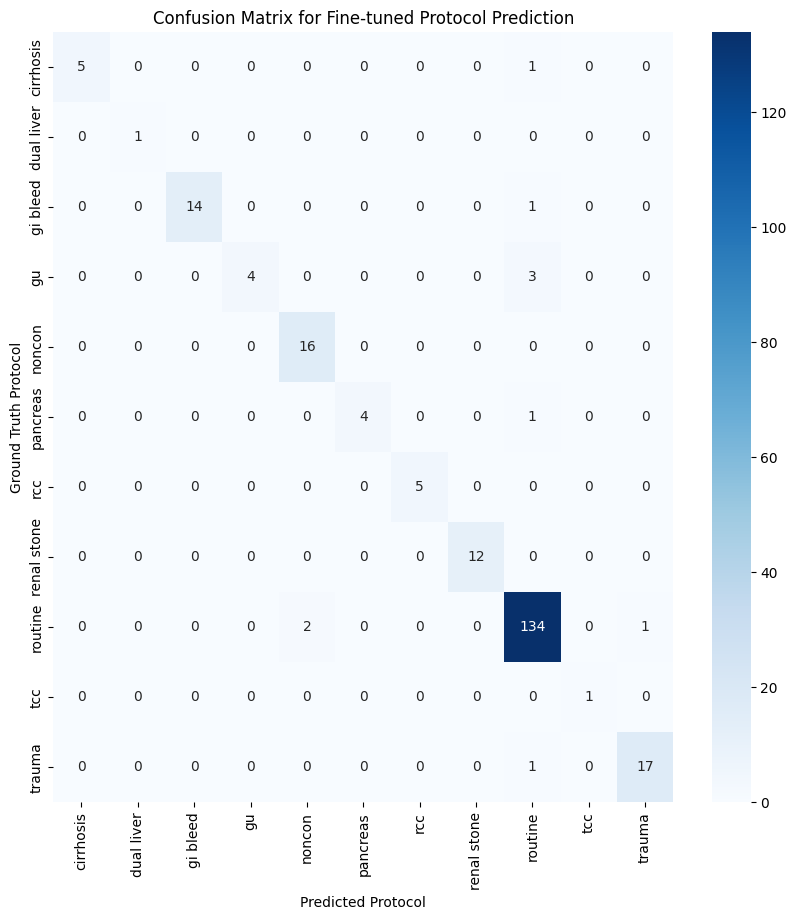

In [16]:



# Extract the ground truth labels and predicted labels


ground_truth = results_df['ft_protocol']
predictions = results_df['ft_predicted_protocol']

# Find the common protocols present in both ground_truth and predictions
common_protocols = np.intersect1d(ground_truth.unique(), predictions.unique())

# Filter the ground_truth and predictions to only include the common protocols
filtered_ground_truth = ground_truth[ground_truth.isin(common_protocols)]
filtered_predictions = predictions[ground_truth.isin(common_protocols)]

# Create the confusion matrix for filtered labels
cm = confusion_matrix(filtered_ground_truth, filtered_predictions, labels=common_protocols)

# Plot the confusion matrix with labels for common protocols
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=common_protocols, yticklabels=common_protocols)
plt.xlabel('Predicted Protocol')
plt.ylabel('Ground Truth Protocol')
plt.title('Confusion Matrix for Fine-tuned Protocol Prediction')

# Save the figure
plt.savefig('/content/confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()